In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# For data loading
from pathlib import Path

# Library for statistics
from scipy import stats
from scipy.stats import norm, skew, pearsonr
from numpy import percentile
from numpy.random import rand

In [2]:
housing_df = pd.read_csv('../Resources/realty_raw_set.csv')
housing_df.head()

,ID,Price,Address,zip,status,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT
0,1,427167,3231 W MARYLAND AVE,85017,Active,WEST PLAZA 6 LOT 614-787,1958,3,2.0,1302.0
1,2,400000,5109 E THOMAS RD,85018,Active,PAPAGO VILLAGE,1943,0,0.0,1358.0
2,3,399900,8020 W STELLA AVE,85303,Active,SHALIMAR,1997,3,2.0,1505.0
3,4,349000,6944 W Verde LN,85033,Active,MARYVALE TERRACE NO. 49,1983,3,3.0,1514.0
4,5,419000,4105 W PASADENA AVE,85019,Active,TU-DOR ESTATES,1971,4,2.0,1908.0


In [3]:
# Check data type and make sure that our data is clean (has no null values, etc)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1073 non-null   int64  
 1   Price        1073 non-null   int64  
 2   Address      1073 non-null   object 
 3   zip          1073 non-null   int64  
 4   status       1073 non-null   object 
 5   Subdivision  1071 non-null   object 
 6   Year Built   1073 non-null   int64  
 7   Bedrooms     1073 non-null   int64  
 8   Bathrooms    1073 non-null   float64
 9   Approx SQFT  1073 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 84.0+ KB


In [4]:
housing_df.count()

ID             1073
Price          1073
Address        1073
zip            1073
status         1073
Subdivision    1071
Year Built     1073
Bedrooms       1073
Bathrooms      1073
Approx SQFT    1073
dtype: int64

In [5]:
housing_df.shape

(1073, 10)

In [6]:
housing_df.isna().sum().to_dict()

{'ID': 0,
 'Price': 0,
 'Address': 0,
 'zip': 0,
 'status': 0,
 'Subdivision': 2,
 'Year Built': 0,
 'Bedrooms': 0,
 'Bathrooms': 0,
 'Approx SQFT': 0}

In [7]:
housing_df.describe()

,ID,Price,zip,Year Built,Bedrooms,Bathrooms,Approx SQFT
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000
mean,537.000000,515795.278658,85083.543336,1971.668220,3.381174,2.109506,1726.404473
std,309.892723,176099.978812,110.782900,22.822071,0.822435,0.608846,542.758492
min,1.000000,169000.000000,85003.000000,1900.000000,0.000000,0.000000,442.000000
25%,269.000000,390000.000000,85018.000000,1955.000000,3.000000,2.000000,1372.000000
50%,537.000000,462320.000000,85032.000000,1970.000000,3.000000,2.000000,1651.000000
75%,805.000000,600000.000000,85051.000000,1984.000000,4.000000,2.000000,2002.000000
max,1073.000000,1000000.000000,85345.000000,2023.000000,12.000000,6.000000,4423.000000


In [8]:
housing_df.tail()

,ID,Price,Address,zip,status,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT
1068,1069,650000,7837 N 13TH ST,85020,Active,SUNSET BOWL,1977,3,3.0,2134.0
1069,1070,475000,4027 W CAMELBACK RD,85019,Active,JOHNSON PLACE,1948,3,1.0,1140.0
1070,1071,948040,1359 E MCLELLAN BLVD,85014,UCB (Under Contract-Backups),Kensington,2022,5,4.5,3314.0
1071,1072,300000,330 N 21ST AVE,85009,Active,CHRISTY ACRES BLK 1,1940,4,2.0,1373.0
1072,1073,699500,814 E LAWRENCE RD,85014,Active,BEVERLY MANOR LOT 7 BLK 4,1975,4,3.5,2491.0


In [9]:
housing_df.value_counts()

ID    Price   Address              zip    status                        Subdivision                                  Year Built  Bedrooms  Bathrooms  Approx SQFT
1     427167  3231 W MARYLAND AVE  85017  Active                        WEST PLAZA 6 LOT 614-787                     1958        3         2.0        1302.0         1
722   369000  2336 N 48TH LN       85035  UCB (Under Contract-Backups)  WEDGEWOOD PARK                               1963        4         2.0        1628.0         1
708   499000  3522 N 3rd ST        85012  Active                        LOT 24 BLOCK 3 BELLA VISTA PLACE MCR 000638  1940        3         2.0        2413.0         1
709   399900  4420 W KEIM DR       85301  Active                        WEST PLAZA 15                                1963        3         2.0        1412.0         1
710   420000  4126 W IRWIN AVE     85041  Active                        ARLINGTON ESTATES PHASE 2                    2004        3         2.5        2103.0         1
   

In [10]:
housing_df.head(10)

,ID,Price,Address,zip,status,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT
0,1,427167,3231 W MARYLAND AVE,85017,Active,WEST PLAZA 6 LOT 614-787,1958,3,2.00,1302.0
1,2,400000,5109 E THOMAS RD,85018,Active,PAPAGO VILLAGE,1943,0,0.00,1358.0
2,3,399900,8020 W STELLA AVE,85303,Active,SHALIMAR,1997,3,2.00,1505.0
3,4,349000,6944 W Verde LN,85033,Active,MARYVALE TERRACE NO. 49,1983,3,3.00,1514.0
4,5,419000,4105 W PASADENA AVE,85019,Active,TU-DOR ESTATES,1971,4,2.00,1908.0
5,6,428900,2917 W SIERRA ST,85029,Active,GOLDWATER LAKES,1977,2,2.00,1272.0
6,7,360000,3632 W RUTH AVE,85051,Active,SUNSET GARDENS,1960,3,1.75,1566.0
7,8,360000,5628 S 41ST ST,85040,Active,KNOELL GARDEN GROVES UNIT 6,1979,2,2.00,1120.0
8,9,875000,541 W MARLETTE AVE,85013,Active,AMBASSADOR ESTS,1960,3,2.00,2270.0
9,10,335000,6716 N 51ST DR,85301,Active,SHEETS ADD,1947,3,2.00,1210.0


In [11]:
housing_df = housing_df.dropna()

In [12]:
housing_df.isna().sum().to_dict()

{'ID': 0,
 'Price': 0,
 'Address': 0,
 'zip': 0,
 'status': 0,
 'Subdivision': 0,
 'Year Built': 0,
 'Bedrooms': 0,
 'Bathrooms': 0,
 'Approx SQFT': 0}

In [13]:
housing_df.head(10)

,ID,Price,Address,zip,status,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT
0,1,427167,3231 W MARYLAND AVE,85017,Active,WEST PLAZA 6 LOT 614-787,1958,3,2.00,1302.0
1,2,400000,5109 E THOMAS RD,85018,Active,PAPAGO VILLAGE,1943,0,0.00,1358.0
2,3,399900,8020 W STELLA AVE,85303,Active,SHALIMAR,1997,3,2.00,1505.0
3,4,349000,6944 W Verde LN,85033,Active,MARYVALE TERRACE NO. 49,1983,3,3.00,1514.0
4,5,419000,4105 W PASADENA AVE,85019,Active,TU-DOR ESTATES,1971,4,2.00,1908.0
5,6,428900,2917 W SIERRA ST,85029,Active,GOLDWATER LAKES,1977,2,2.00,1272.0
6,7,360000,3632 W RUTH AVE,85051,Active,SUNSET GARDENS,1960,3,1.75,1566.0
7,8,360000,5628 S 41ST ST,85040,Active,KNOELL GARDEN GROVES UNIT 6,1979,2,2.00,1120.0
8,9,875000,541 W MARLETTE AVE,85013,Active,AMBASSADOR ESTS,1960,3,2.00,2270.0
9,10,335000,6716 N 51ST DR,85301,Active,SHEETS ADD,1947,3,2.00,1210.0


In [14]:
housing_df.count()

ID             1071
Price          1071
Address        1071
zip            1071
status         1071
Subdivision    1071
Year Built     1071
Bedrooms       1071
Bathrooms      1071
Approx SQFT    1071
dtype: int64

In [15]:
housing_df.shape

(1071, 10)

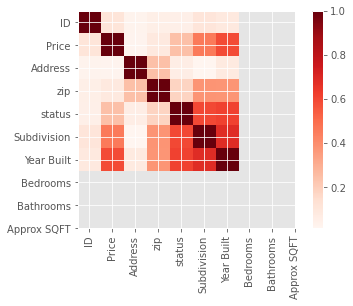

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.imshow(housing_df.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(housing_df.columns))]
plt.xticks(tick_marks, housing_df.columns, rotation='vertical')
plt.yticks(tick_marks, housing_df.columns)
plt.show()